In [ ]:
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y = True) #Load the dataset

In [ ]:
from sklearn.model_selection import train_test_split 

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 1) #Split the ENTIRE Dataset into two categories - Train and Test
Xtrain, Xval, ytrain, yval = train_test_split(Xtrain, ytrain) #Split the Training Set (split in previous line) into a smaller training set and an intermediate "validation" set

Answer to Image 0: 0
Answer to Image 1: 1
Answer to Image 2: 2
Answer to Image 3: 3
Answer to Image 4: 4


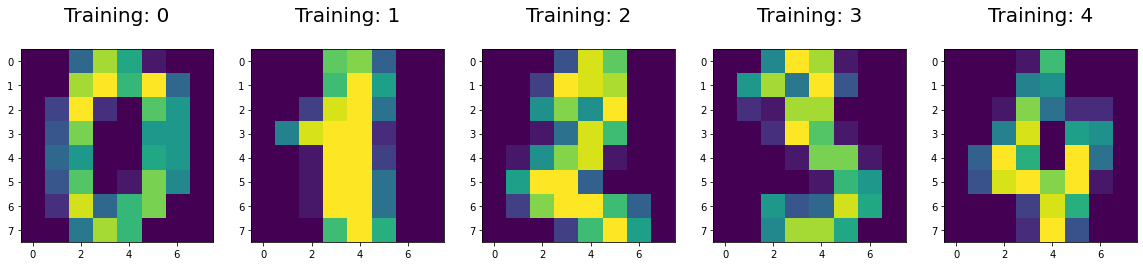

In [ ]:
'''
Visualization of Data - Note: we skipped this because we all know what numbers look like & time reasons,
but it is a Good Idea to do this!
'''
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X[0:5], y[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)))
 plt.title('Training: %i\n' % label, fontsize = 20)

for i in range(5):
  print(f'Answer to Image {i}: {y[i]}')


In [ ]:
'''
Hard way ... before Cross Validation - 
Brute Force a range of possibilities and use a BUUUNCH of variables to store the optimal parameters !! 
'''
from sklearn.linear_model import LogisticRegression #Importing the model
from sklearn.metrics import accuracy_score #Evaluation

bestAcc = -1 #Define a global max to store the best parameters - accuracy and the C value which we are "tuning"
bestC = 0

for i in range(-20, 20):
    model = LogisticRegression(C = 10**i, max_iter = 1000, solver='liblinear')
    model.fit(Xtrain, ytrain) #Train on the training set

    predY = model.predict(Xval) #Evaluate on a validation set
    acc = accuracy_score(yval, predY)
    if acc > bestAcc:
        bestAcc = acc
        bestC = 10 ** i

#We find the best model depending on the Best Accuracy on Validation Set
model = LogisticRegression( C = 10 ** bestC, max_iter=1000, solver='liblinear')
model.fit(Xtrain, ytrain)

#Then we evaluate the model on the last dataset - the test set (We can skip the validation set since we already use it to find the best model)
predY = model.predict(Xtest)
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(ytest, predY))

Results on the test set:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        53
           1       0.98      0.98      0.98        42
           2       1.00      0.95      0.97        41
           3       0.98      0.94      0.96        52
           4       0.92      1.00      0.96        47
           5       0.93      0.95      0.94        39
           6       1.00      1.00      1.00        43
           7       1.00      0.96      0.98        48
           8       0.95      0.97      0.96        37
           9       0.92      0.96      0.94        48

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



In [ ]:
'''
Easy Method: K Fold Cross Validation
'''
from sklearn.model_selection import GridSearchCV #Cross Validation / Neural Network Tuning

model = LogisticRegression(C = 100 , max_iter= 1000, solver='liblinear')
parameters = {'C' : [10**i for i in range(-20,20)] } 
bestModel = GridSearchCV(model, parameters) 
bestModel.fit(Xtrain, ytrain) #Train / Search for the best 
print(bestModel.best_params_)

{'C': 0.01}


In [ ]:
'''
Evaluating the best model from KFold
Note: With KFold, we do NOT need an intermediate validation set to prevent overfitting. KFold already splits it into its own 'validation set'
'''

predY = bestModel.predict(Xtest)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(ytest, predY))

Results on the test set:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       1.00      0.95      0.98        42
           2       0.98      1.00      0.99        41
           3       1.00      0.94      0.97        52
           4       0.96      1.00      0.98        47
           5       0.90      0.95      0.92        39
           6       0.98      1.00      0.99        43
           7       0.98      0.98      0.98        48
           8       0.97      0.92      0.94        37
           9       0.94      0.96      0.95        48

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450

